<img src='images/img.png' />

# CS5228 Project, Group 32

## Data Preprocessing
In this part, we are going to perform some data preprocessing steps. This may include:
* Data cleaning: handle missing values, duplicates, inconsistant or invalid vallues, outliers

* Data reduction: reduce number of attributes, reduce number of attribute values

* Data transformation: attribute construction, normalization

* Data discretization: encode to numerical attributes

### Setting up the Notebook

In [1]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load file into pandas dataframe
df = pd.read_csv('./data/train.csv')

num_records, num_attributes = df.shape

print('There are {} data points, each with {} attributes.'. format(num_records, num_attributes))

There are 25000 data points, each with 30 attributes.


### Data Cleaning

Before data cleaning, remove the known attributes that are not meaningful to our prediction model:
  * Meaningless idendifier: listing_id 
  * Attributes in free text: title, description, features, accessories
  * Attribute with the same value: eco_category, indicative_price
  * Attribute unlikely to affect price: curb_weight

In [3]:
columns_to_drop = [
    'listing_id',          # Meaningless identifier
    'title',               # Attributes in free text
    # 'category',
    'description',
    'features',
    'accessories',
    'eco_category',        # Attribute with the same value
    'indicative_price',
    'curb_weight',         # Attribute unlikely to affect price

    'original_reg_date',
    'lifespan',
]

df = df.drop(columns=columns_to_drop)

num_records, num_attributes = df.shape

print('There are {} data points, each with {} attributes.'. format(num_records, num_attributes))

There are 25000 data points, each with 20 attributes.


### Handle Missing Values
Firstly, for each of the columns with missing value, check the number of rows with NaN values.
There are 3 scenarios:
1. NaN value is the major (e.g. fuel_type has 19121 rows with NaN values), we remove the corresponding attritubes.
2. NaN value is the minor. We can choose to fill or delete related data points. 

In [4]:
columns_to_check = [
    'make',
    'fuel_type',
    'manufactured',
    'power',
    'engine_cap',
    'mileage',
    'no_of_owners',
    'depreciation',
    'road_tax',
    'dereg_value',
    'omv',
    'arf',
    'opc_scheme'
]

# Calculate the number of NaN values in each specified column
nan_counts = df[columns_to_check].isna().sum()

# Print the number of NaN values for each column
for column, count in nan_counts.items():
    print(f'Column "{column}" has {count} rows with NaN values.')

Column "make" has 1316 rows with NaN values.
Column "fuel_type" has 19121 rows with NaN values.
Column "manufactured" has 7 rows with NaN values.
Column "power" has 2640 rows with NaN values.
Column "engine_cap" has 596 rows with NaN values.
Column "mileage" has 5304 rows with NaN values.
Column "no_of_owners" has 18 rows with NaN values.
Column "depreciation" has 507 rows with NaN values.
Column "road_tax" has 2632 rows with NaN values.
Column "dereg_value" has 220 rows with NaN values.
Column "omv" has 64 rows with NaN values.
Column "arf" has 174 rows with NaN values.
Column "opc_scheme" has 24838 rows with NaN values.


We delete attributes with TOO many NaN value here.

In [5]:
columns_to_drop_nan = [
    'fuel_type',
    'opc_scheme'
]

df = df.drop(columns=columns_to_drop_nan)

Then we try to fill up other missing values.

In [6]:
from util.DataPreprocess import HandlingMissingValues

df = HandlingMissingValues(df)

NaN values after handling:  0


### Remove Exact Duplicates
We remove duplicated data points here.

In [7]:
df = df.drop_duplicates()

num_records, num_attributes = df.shape

print('There are {} data points, each with {} attributes.'. format(num_records, num_attributes))

There are 24258 data points, each with 18 attributes.


### Transform categorical value to numerical values

In [8]:
categorical_columns = [
    'make',
    'model',
    'type_of_vehicle',
    'transmission',
]

le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

### Transform date time attributes to numerical values

In [9]:
df['reg_date'] = pd.to_datetime(df['reg_date'], format='%d-%b-%Y')
df['reg_year'] = df['reg_date'].dt.year
df = df.drop(columns=['reg_date'])

num_records, num_attributes = df.shape

print('There are {} data points, each with {} attributes.'. format(num_records, num_attributes))

There are 24258 data points, each with 18 attributes.


### Data Encoding

In [10]:
from util.DataPreprocess import DataEncoding

df = DataEncoding(df)

### Outliers removal

In [11]:
from util.DataPreprocess import OutlierRemoval
df = OutlierRemoval(df)

There are 23923 data points, each with 18 attributes


### Saving the Data

In [12]:
output_file = './data/train_preprocessed.csv'


# Check if the file exists
if os.path.exists(output_file):
    # Delete the file
    os.remove(output_file)
    print(f'Existing file "{output_file}" has been deleted.')

# Save the DataFrame to CSV
df.to_csv(output_file, index=False)
print(f'DataFrame has been saved to "{output_file}".')

Existing file "./data/train_preprocessed.csv" has been deleted.
DataFrame has been saved to "./data/train_preprocessed.csv".


## Data Mining

### We load our preprocessed data first

In [13]:
# Load file into pandas dataframe, we saved our preprocessed file at path 'output_file'
output_file = './data/train_preprocessed.csv'
df = pd.read_csv(output_file)

num_records, num_attributes = df.shape
print('There are {} data points, each with {} attributes.'. format(num_records, num_attributes))
columns_to_keep = [
    'model',
    'dereg_value',
    'arf',
    'omv',
    'depreciation',
    'power',
    'coe',
    'price',
]

df = df[columns_to_keep]

There are 23923 data points, each with 18 attributes.


### Mining code here

In [14]:
from util.DataMining import split_dataframe, split_dataframe_flex
from util.DataMining import RandomForestMining, RandomForestMiningByModel

In [15]:
run_times, rmse_sum = 1, 0
for i in tqdm(range(run_times), desc='Running Random Foresr'):
    target_col = 'price'
    x_train, x_test, y_train, y_test = split_dataframe(df, target_col)
    rmse_sum += RandomForestMining(x_train, x_test, y_train, y_test)
print('Average RMSE:', round(rmse_sum / run_times))

Running Random Foresr: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.55s/it]

RMSE on test data: 23833.642849834305
Average RMSE: 23834


In [16]:
run_times, rmse_sum = 1, 0
for i in tqdm(range(run_times), desc='Running Random Foresr'):
    target_col = 'price'
    x_train, x_test, y_train, y_test = split_dataframe(df, target_col)
    rmse_sum += RandomForestMining(x_train, x_test, y_train, y_test)
print('Average RMSE:', round(rmse_sum / run_times))

Running Random Foresr: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.38s/it]

RMSE on test data: 18039.286970114757
Average RMSE: 18039


Index(['model', 'dereg_value', 'arf', 'omv', 'depreciation', 'power', 'coe',
       'price'],
      dtype='object')


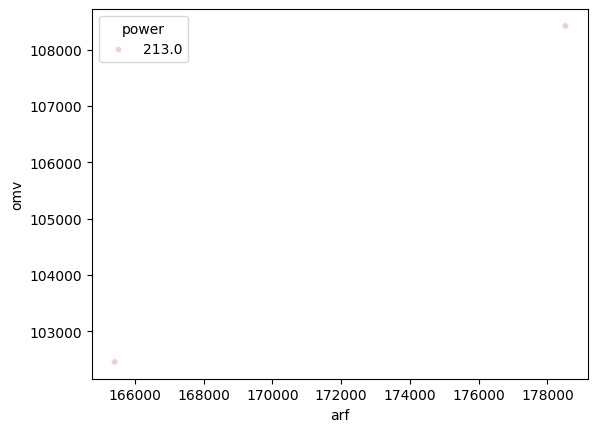

In [17]:
df_new = df[df['model'] == 100]

print(df.columns)

# sns.scatterplot(x='omv', y='arf', hue='reg_year_binned', data=df_new, s=20)
sns.scatterplot(x='arf', y='omv', hue='power', data=df_new, s=20)
plt.show()

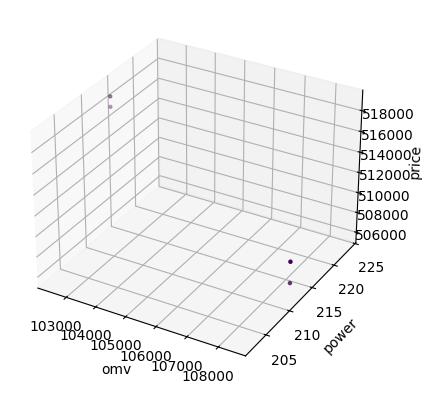

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = df_new['omv']
y = df_new['power']
z = df_new['price']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=y, cmap='viridis', s=5)

ax.set_xlabel('omv')
ax.set_ylabel('power')
ax.set_zlabel('price')

plt.show()
